# Primer on Probability with pgmpy

This notebook demonstrates fundamental probability concepts using the `pgmpy` library, which is designed for probabilistic graphical models.

## Setup

In [14]:
import pgmpy
print(pgmpy.__version__)

1.0.0


## Marginal Distribution P(X)

A **marginal distribution** describes the probability of a single variable without reference to other variables. Here we define P(X) where X can take values 1, 2, or 3 with probabilities 0.45, 0.30, and 0.25 respectively.

Note that the probabilities sum to 1.0, satisfying the axiom that all probabilities in a distribution must sum to unity.

In [15]:
from pgmpy.factors.discrete import DiscreteFactor

dist = DiscreteFactor(
    variables=["X"],
    cardinality=[3],
    values=[0.45, 0.30, 0.25],
    state_names={"X": ["1", "2", "3"]},
)
print(dist)

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(1) |   0.4500 |
+------+----------+
| X(2) |   0.3000 |
+------+----------+
| X(3) |   0.2500 |
+------+----------+


## Joint Distribution P(X, Y)

A **joint distribution** P(X, Y) describes the probability of two variables occurring together. This table shows all combinations of X (with 3 states) and Y (with 2 states), giving 6 probability values.

The values array is ordered by iterating through Y states for each X state: [P(X=1,Y=0), P(X=1,Y=1), P(X=2,Y=0), P(X=2,Y=1), P(X=3,Y=0), P(X=3,Y=1)].

In [16]:
joint = DiscreteFactor(
    variables=["X", "Y"],
    cardinality=[3, 2],
    values=[0.25, 0.2, 0.2, 0.10, 0.15, 0.10],
    state_names={"X": ["1", "2", "3"], "Y": ["0", "1"]},
)
print(joint)

+------+------+------------+
| X    | Y    |   phi(X,Y) |
+======+======+============+
| X(1) | Y(0) |     0.2500 |
+------+------+------------+
| X(1) | Y(1) |     0.2000 |
+------+------+------------+
| X(2) | Y(0) |     0.2000 |
+------+------+------------+
| X(2) | Y(1) |     0.1000 |
+------+------+------------+
| X(3) | Y(0) |     0.1500 |
+------+------+------------+
| X(3) | Y(1) |     0.1000 |
+------+------+------------+


## Marginalization: Recovering P(X) from P(X, Y)

**Marginalization** is the process of summing out variables from a joint distribution. By summing over all values of Y, we recover the marginal distribution P(X):

$$P(X) = \sum_Y P(X, Y)$$

For example: P(X=1) = P(X=1, Y=0) + P(X=1, Y=1) = 0.25 + 0.20 = 0.45

Notice this matches our original P(X) distribution defined earlier.

In [17]:
print(joint.marginalize(["Y"], inplace=False))

+------+----------+
| X    |   phi(X) |
+======+==========+
| X(1) |   0.4500 |
+------+----------+
| X(2) |   0.3000 |
+------+----------+
| X(3) |   0.2500 |
+------+----------+


Similarly, we can marginalize over X to get P(Y):

$$P(Y) = \sum_X P(X, Y)$$

In [18]:
print(joint.marginalize(["X"], inplace=False))

+------+----------+
| Y    |   phi(Y) |
+======+==========+
| Y(0) |   0.6000 |
+------+----------+
| Y(1) |   0.4000 |
+------+----------+


## Conditional Probability P(Y|X)

**Conditional probability** P(Y|X) represents the probability of Y given that we know the value of X. It's computed using the definition:

$$P(Y|X) = \frac{P(X, Y)}{P(X)}$$

In pgmpy, dividing the joint distribution by a marginal distribution automatically computes the conditional. For each value of X, the Y probabilities now sum to 1.

For example, for X=1:
- P(Y=0|X=1) = P(X=1,Y=0) / P(X=1) = 0.25 / 0.45 ≈ 0.556
- P(Y=1|X=1) = P(X=1,Y=1) / P(X=1) = 0.20 / 0.45 ≈ 0.444

### The Chain Rule of Probability

The **chain rule** (or product rule) expresses any joint distribution as a product of conditionals:

$$P(X, Y) = P(Y|X) \cdot P(X) = P(X|Y) \cdot P(Y)$$

For multiple variables:
$$P(X_1, X_2, ..., X_n) = P(X_1) \cdot P(X_2|X_1) \cdot P(X_3|X_1,X_2) \cdots P(X_n|X_1,...,X_{n-1})$$

This decomposition is central to **Bayesian networks**, which simplify these products using conditional independence.

### Law of Total Probability

The **law of total probability** computes a marginal by summing over all conditions:

$$P(Y) = \sum_x P(Y|X=x) \cdot P(X=x)$$

This connects marginalization to conditional probabilities—we can compute P(Y) by averaging P(Y|X) over all values of X, weighted by P(X).

In [19]:
print(joint/dist)

+------+------+------------+
| X    | Y    |   phi(X,Y) |
+======+======+============+
| X(1) | Y(0) |     0.5556 |
+------+------+------------+
| X(1) | Y(1) |     0.4444 |
+------+------+------------+
| X(2) | Y(0) |     0.6667 |
+------+------+------------+
| X(2) | Y(1) |     0.3333 |
+------+------+------------+
| X(3) | Y(0) |     0.6000 |
+------+------+------------+
| X(3) | Y(1) |     0.4000 |
+------+------+------------+


## Bayes' Rule

**Bayes' rule** lets us "invert" conditional probabilities—computing P(X|Y) from P(Y|X):

$$P(X|Y) = \frac{P(Y|X) \cdot P(X)}{P(Y)}$$

This is fundamental to **Bayesian inference**, where we update our beliefs about parameters (X) after observing data (Y):
- **P(X)**: Prior belief about X before seeing data
- **P(Y|X)**: Likelihood of data given X  
- **P(X|Y)**: Posterior belief about X after seeing data
- **P(Y)**: Evidence (normalizing constant)

In [ ]:
# Bayes' rule example using our distributions
# We have P(Y|X) from joint/dist, now compute P(X|Y)

p_y_given_x = joint / dist  # P(Y|X) computed earlier
p_y = joint.marginalize(["X"], inplace=False)  # P(Y)

# P(X|Y) = P(Y|X) * P(X) / P(Y) = P(X,Y) / P(Y)
p_x_given_y = joint / p_y
print("P(X|Y) - Posterior probability of X given Y:")
print(p_x_given_y)

## Canonical Classes of Probability Distributions

Probability distributions come in several well-studied families. Here are the most important ones:

**Discrete Distributions:**
- **Bernoulli**: Models a single binary outcome (success/failure) with probability p
- **Binomial**: Models the number of successes in n independent Bernoulli trials
- **Categorical**: Generalizes Bernoulli to k possible outcomes
- **Poisson**: Models the count of events occurring in a fixed interval

**Continuous Distributions:**
- **Uniform**: All values in an interval are equally likely
- **Normal (Gaussian)**: The famous bell curve, characterized by mean μ and standard deviation σ
- **Exponential**: Models time between events in a Poisson process
- **Beta**: Models probabilities, useful as a prior in Bayesian inference

In [20]:
import numpy as np
from scipy import stats

# Bernoulli: coin flip with P(heads) = 0.7
bernoulli = stats.bernoulli(p=0.7)
print(f"Bernoulli(p=0.7): P(X=1) = {bernoulli.pmf(1):.2f}, P(X=0) = {bernoulli.pmf(0):.2f}")

# Binomial: number of heads in 10 coin flips
binomial = stats.binom(n=10, p=0.5)
print(f"Binomial(n=10, p=0.5): P(X=5) = {binomial.pmf(5):.4f}")

# Normal: standard normal distribution
normal = stats.norm(loc=0, scale=1)
print(f"Normal(μ=0, σ=1): P(X < 0) = {normal.cdf(0):.2f}")

# Poisson: average of 3 events per interval
poisson = stats.poisson(mu=3)
print(f"Poisson(λ=3): P(X=3) = {poisson.pmf(3):.4f}")

Bernoulli(p=0.7): P(X=1) = 0.70, P(X=0) = 0.30
Binomial(n=10, p=0.5): P(X=5) = 0.2461
Normal(μ=0, σ=1): P(X < 0) = 0.50
Poisson(λ=3): P(X=3) = 0.2240


## Conditional Probability with Canonical Distributions

When working with canonical distributions, conditional probabilities often have elegant closed-form solutions.

**Conditional Normal Distribution**: If $(X, Y)$ follow a bivariate normal distribution, then $Y|X=x$ is also normal:

$$Y|X=x \sim \mathcal{N}\left(\mu_Y + \rho\frac{\sigma_Y}{\sigma_X}(x - \mu_X), \sigma_Y^2(1-\rho^2)\right)$$

where $\rho$ is the correlation between X and Y.

**Bayesian Updating with Conjugate Priors**: When the prior and likelihood are "conjugate," the posterior has the same form as the prior:
- Beta prior + Binomial likelihood → Beta posterior
- Normal prior + Normal likelihood → Normal posterior
- Gamma prior + Poisson likelihood → Gamma posterior

In [21]:
# Example: Bivariate normal and conditional distribution
# X and Y with correlation rho = 0.8
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 1, 1
rho = 0.8

# Conditional distribution Y | X = 2
x_observed = 2
conditional_mean = mu_y + rho * (sigma_y / sigma_x) * (x_observed - mu_x)
conditional_std = sigma_y * np.sqrt(1 - rho**2)

print(f"Marginal Y: N(μ={mu_y}, σ={sigma_y})")
print(f"Conditional Y|X=2: N(μ={conditional_mean:.2f}, σ={conditional_std:.2f})")
print(f"\nObserving X=2 shifts our expectation of Y from {mu_y} to {conditional_mean:.2f}")
print(f"and reduces our uncertainty from σ={sigma_y} to σ={conditional_std:.2f}")

Marginal Y: N(μ=0, σ=1)
Conditional Y|X=2: N(μ=1.60, σ=0.60)

Observing X=2 shifts our expectation of Y from 0 to 1.60
and reduces our uncertainty from σ=1 to σ=0.60


## Visualizing Distributions

Visualization is essential for understanding probability distributions. Common plots include:
- **PMF/PDF plots**: Show the probability (mass/density) at each value
- **CDF plots**: Show cumulative probability P(X ≤ x)
- **Histograms**: Approximate distributions from samples
- **Contour plots**: Visualize joint distributions in 2D

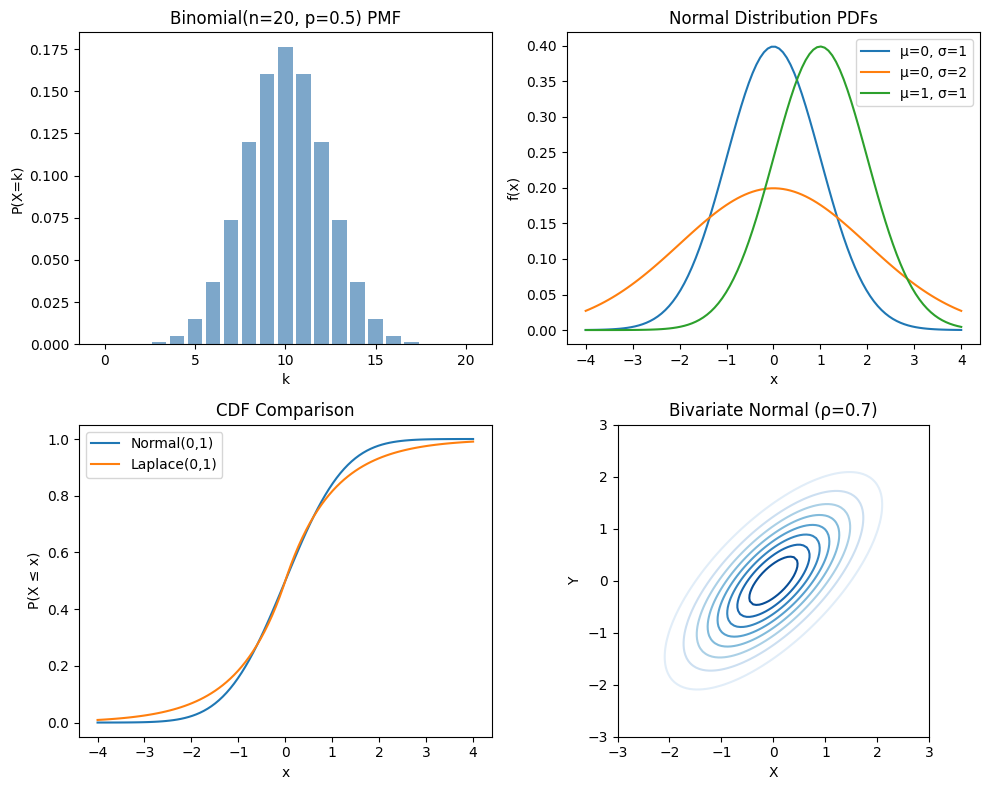

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Discrete distribution (Binomial PMF)
ax = axes[0, 0]
n, p = 20, 0.5
x_binom = np.arange(0, n+1)
ax.bar(x_binom, stats.binom.pmf(x_binom, n, p), color='steelblue', alpha=0.7)
ax.set_title('Binomial(n=20, p=0.5) PMF')
ax.set_xlabel('k')
ax.set_ylabel('P(X=k)')

# 2. Continuous distribution (Normal PDF)
ax = axes[0, 1]
x_norm = np.linspace(-4, 4, 100)
for mu, sigma in [(0, 1), (0, 2), (1, 1)]:
    ax.plot(x_norm, stats.norm.pdf(x_norm, mu, sigma), 
            label=f'μ={mu}, σ={sigma}')
ax.set_title('Normal Distribution PDFs')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

# 3. CDF comparison
ax = axes[1, 0]
ax.plot(x_norm, stats.norm.cdf(x_norm, 0, 1), label='Normal(0,1)')
ax.plot(x_norm, stats.laplace.cdf(x_norm, 0, 1), label='Laplace(0,1)')
ax.set_title('CDF Comparison')
ax.set_xlabel('x')
ax.set_ylabel('P(X ≤ x)')
ax.legend()

# 4. Bivariate normal contour
ax = axes[1, 1]
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rv = stats.multivariate_normal([0, 0], [[1, 0.7], [0.7, 1]])
ax.contour(X, Y, rv.pdf(pos), levels=10, cmap='Blues')
ax.set_title('Bivariate Normal (ρ=0.7)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## Independence and Conditional Independence

**Independence**: Two variables X and Y are independent (written $X \perp Y$) if knowing one tells you nothing about the other:

$$P(X, Y) = P(X) \cdot P(Y)$$

Equivalently: $P(Y|X) = P(Y)$

**Conditional Independence**: X and Y are conditionally independent given Z (written $X \perp Y | Z$) if:

$$P(X, Y | Z) = P(X|Z) \cdot P(Y|Z)$$

This means once we know Z, learning X provides no additional information about Y.

In [24]:
# Test for independence: P(X,Y) should equal P(X) * P(Y)
# Using our joint distribution from earlier

# Get marginals
p_x = joint.marginalize(["Y"], inplace=False)
p_y = joint.marginalize(["X"], inplace=False)

# If X and Y were independent, P(X,Y) = P(X) * P(Y)
independent_joint = p_x * p_y
print("Actual joint distribution P(X,Y):")
print(joint)
print("\nIf X,Y were independent, P(X)*P(Y) would be:")
print(independent_joint)
print("\nSince these differ, X and Y are NOT independent.")

Actual joint distribution P(X,Y):
+------+------+------------+
| X    | Y    |   phi(X,Y) |
+======+======+============+
| X(1) | Y(0) |     0.2500 |
+------+------+------------+
| X(1) | Y(1) |     0.2000 |
+------+------+------------+
| X(2) | Y(0) |     0.2000 |
+------+------+------------+
| X(2) | Y(1) |     0.1000 |
+------+------+------------+
| X(3) | Y(0) |     0.1500 |
+------+------+------------+
| X(3) | Y(1) |     0.1000 |
+------+------+------------+

If X,Y were independent, P(X)*P(Y) would be:
+------+------+------------+
| Y    | X    |   phi(Y,X) |
+======+======+============+
| Y(0) | X(1) |     0.2700 |
+------+------+------------+
| Y(0) | X(2) |     0.1800 |
+------+------+------------+
| Y(0) | X(3) |     0.1500 |
+------+------+------------+
| Y(1) | X(1) |     0.1800 |
+------+------+------------+
| Y(1) | X(2) |     0.1200 |
+------+------+------------+
| Y(1) | X(3) |     0.1000 |
+------+------+------------+

Since these differ, X and Y are NOT independent.


### Conditional Independence and Causality

Conditional independence is **fundamental to causal reasoning**. In causal graphs:

1. **Chain (X → Z → Y)**: X and Y are dependent, but $X \perp Y | Z$ (conditioning on Z blocks the path)

2. **Fork (X ← Z → Y)**: X and Y are dependent (confounded by Z), but $X \perp Y | Z$ (conditioning removes confounding)

3. **Collider (X → Z ← Y)**: X and Y are independent, but become dependent when conditioning on Z ($X \not\perp Y | Z$)

These patterns form the basis of **d-separation** in causal graphs, which tells us which conditional independencies hold in a causal model.

In [27]:
# Example: Collider structure (X → Z ← Y)
# X and Y are independent causes of Z

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Create a collider: X → Z ← Y
collider = DiscreteBayesianNetwork([("X", "Z"), ("Y", "Z")])

# X and Y are independent priors
cpd_x = TabularCPD("X", 2, [[0.5], [0.5]])
cpd_y = TabularCPD("Y", 2, [[0.5], [0.5]])

# Z depends on both X and Y (e.g., Z=1 if either X=1 or Y=1)
cpd_z = TabularCPD("Z", 2, 
    [[0.9, 0.2, 0.2, 0.05],   # P(Z=0 | X, Y)
     [0.1, 0.8, 0.8, 0.95]],  # P(Z=1 | X, Y)
    evidence=["X", "Y"], evidence_card=[2, 2])

collider.add_cpds(cpd_x, cpd_y, cpd_z)
print("Collider structure: X → Z ← Y")
print(f"X independent of Y? {collider.is_dconnected('X', 'Y', [])}")
print(f"X independent of Y given Z? {collider.is_dconnected('X', 'Y', ['Z'])}")
print("\n→ Conditioning on the collider Z CREATES dependence between X and Y!")

Collider structure: X → Z ← Y
X independent of Y? False
X independent of Y given Z? True

→ Conditioning on the collider Z CREATES dependence between X and Y!


## Expected Value

The **expected value** (or mean) of a random variable is the probability-weighted average of all possible values:

**Discrete**: $E[X] = \sum_x x \cdot P(X=x)$

**Continuous**: $E[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx$

Key properties:
- **Linearity**: $E[aX + bY] = aE[X] + bE[Y]$ (always holds, even if X and Y are dependent)
- **Law of Iterated Expectations**: $E[Y] = E[E[Y|X]]$ (the expected value of conditional expectations)
- **Conditional Expectation**: $E[Y|X=x]$ is the expected value of Y given we observed X=x

In [28]:
# Expected value examples

# Discrete: Expected value of our X distribution
x_values = np.array([1, 2, 3])
x_probs = np.array([0.45, 0.30, 0.25])
expected_x = np.sum(x_values * x_probs)
print(f"E[X] = 1×0.45 + 2×0.30 + 3×0.25 = {expected_x}")

# Continuous distributions using scipy
print(f"\nBinomial(n=10, p=0.5): E[X] = {stats.binom(10, 0.5).mean()}")
print(f"Poisson(λ=3): E[X] = {stats.poisson(3).mean()}")
print(f"Normal(μ=5, σ=2): E[X] = {stats.norm(5, 2).mean()}")

# Linearity of expectation
a, b = 2, 3
e_x = stats.norm(5, 2).mean()
e_y = stats.norm(10, 3).mean()
print(f"\nLinearity: E[{a}X + {b}Y] = {a}×{e_x} + {b}×{e_y} = {a*e_x + b*e_y}")

E[X] = 1×0.45 + 2×0.30 + 3×0.25 = 1.8

Binomial(n=10, p=0.5): E[X] = 5.0
Poisson(λ=3): E[X] = 3.0
Normal(μ=5, σ=2): E[X] = 5.0

Linearity: E[2X + 3Y] = 2×5.0 + 3×10.0 = 40.0


### Variance and Standard Deviation

**Variance** measures the spread of a distribution—how far values typically deviate from the mean:

$$\text{Var}(X) = E[(X - E[X])^2] = E[X^2] - E[X]^2$$

**Standard deviation** is the square root of variance: $\sigma = \sqrt{\text{Var}(X)}$

Key properties:
- $\text{Var}(aX) = a^2 \text{Var}(X)$
- $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)$ (only if X and Y are independent)

In [ ]:
# Variance examples
print(f"Binomial(n=10, p=0.5): Var(X) = {stats.binom(10, 0.5).var():.2f}, σ = {stats.binom(10, 0.5).std():.2f}")
print(f"Poisson(λ=3): Var(X) = {stats.poisson(3).var():.2f} (equals λ for Poisson)")
print(f"Normal(μ=5, σ=2): Var(X) = {stats.norm(5, 2).var():.2f}, σ = {stats.norm(5, 2).std():.2f}")

## Sampling from Distributions

While probability distributions define theoretical probabilities, we often need to **sample** from them to simulate random processes or perform Monte Carlo estimation.

**Sampling** means drawing random values according to a distribution's probabilities. Each sample is an independent realization of the random variable.

### Sampling from Marginal Distributions

pgmpy's `DiscreteFactor` provides a `sample()` method to draw random samples according to the defined probabilities.

In [29]:
from pgmpy.factors.discrete import DiscreteFactor

dist = DiscreteFactor(
    variables=["X"],
    cardinality=[3],
    values=[0.45, 0.30, 0.25],
    state_names={"X": ["1", "2", "3"]},
)

dist.sample(n=1)

,X
0,1


### Sampling from Joint Distributions

When sampling from a joint distribution, we get simultaneous values for all variables, respecting their joint probabilities.

In [ ]:
joint = DiscreteFactor(
    variables=["X", "Y"],
    cardinality=[3, 2],
    values=[0.25, 0.20, 0.20, 0.10, 0.15, 0.10],
    state_names={"X": ["1", "2", "3"], "Y": ["0", "1"]},
)
joint.sample(n=1)

,X,Y
0,2,0


### Sampling with Pyro and PyTorch

**Pyro** is a probabilistic programming library built on PyTorch. It provides distribution objects that integrate with PyTorch's tensor operations and automatic differentiation.

The `Categorical` distribution generalizes the Bernoulli to multiple categories, returning an index (0, 1, 2, ...) according to the specified probabilities.

In [33]:
import torch
from pyro.distributions import Categorical
Categorical(probs=torch.tensor([.45, .30, .25])).sample()

tensor(0)

## Ancestral (Forward) Sampling from Bayesian Networks

A **Bayesian Network** represents a joint distribution as a product of conditional distributions following a directed acyclic graph (DAG).

**Ancestral sampling** (also called forward sampling) generates samples by:
1. Sampling root nodes from their marginal distributions
2. Sampling each child node from its conditional distribution given its parents
3. Proceeding in topological order until all nodes are sampled

This respects the causal structure: Z → X → Y means we sample Z first, then X given Z, then Y given X.

In [ ]:
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.sampling import BayesianModelSampling

PZ = TabularCPD(
    variable="Z",
    variable_card=2,
    values=[[0.65], [0.35]],
    state_names={"Z": ["0", "1"]},
)

PXgivenZ = TabularCPD(
    variable="X",
    variable_card=2,
    values=[[0.8, 0.6], [0.2, 0.4]],
    evidence=["Z"],
    evidence_card=[2],
    state_names={"X": ["0", "1"], "Z": ["0", "1"]},
)

PYgivenX = TabularCPD(
    variable="Y",
    variable_card=3,
    values=[[0.1, 0.8], [0.2, 0.1], [0.7, 0.1]],
    evidence=["X"],
    evidence_card=[2],
    state_names={"Y": ["1", "2", "3"], "X": ["0", "1"]},
)

model = DiscreteBayesianNetwork([("Z", "X"), ("X", "Y")])
model.add_cpds(PZ, PXgivenZ, PYgivenX)

generator = BayesianModelSampling(model)
generator.forward_sample(size=1)

Generating for node: Y: 100%|██████████| 3/3 [00:00<00:00, 779.42it/s]


,Z,X,Y
0,0,0,3


## Hierarchical and Compound Distributions

Real-world processes often involve **hierarchical** or **compound** distributions where one random variable's value determines another's distribution parameters.

In this example:
- Z ~ Gamma(7.5, 1.0) — a continuous rate parameter
- X | Z ~ Poisson(Z) — count depends on the rate Z  
- Y | X ~ Bernoulli(X/(5+X)) — binary outcome with probability depending on X

This creates a chain of dependencies where upstream randomness propagates downstream.

In [ ]:
import torch
from pyro.distributions import Bernoulli, Poisson, Gamma

z = Gamma(7.5, 1.0).sample()
x = Poisson(z).sample()
y = Bernoulli(x / (5 + x)).sample()
print(z, x, y)

tensor(10.1387) tensor(14.) tensor(1.)


### Random Number of Random Variables

Sometimes the number of random variables itself is random. Here, we sample X coin flips where X is drawn from a Poisson distribution.

This is equivalent to a **compound distribution**: Y | X ~ Binomial(X, 0.5), where X ~ Poisson(Z) and Z ~ Gamma(7.5, 1.0).

Such constructions are common in Bayesian nonparametrics and mixture models.

In [39]:
import torch
from pyro.distributions import Bernoulli, Poisson, Gamma
z = Gamma(7.5, 1.0).sample()
x = Poisson(z).sample()
y = torch.tensor(0.0)
for i in range(int(x)):
    y += Bernoulli(.5).sample()
print(z, x, y)

tensor(7.8285) tensor(9.) tensor(6.)


## Probabilistic Programs

A **probabilistic program** encapsulates a generative process as a function. Using `pyro.sample()` instead of direct `.sample()` calls enables:

- **Naming**: Each random variable gets a unique name for tracking
- **Inference**: Pyro can condition on observed values and perform posterior inference
- **Tracing**: The execution trace records all random choices

This is the foundation of **probabilistic programming languages** (PPLs), which allow expressing complex generative models as code and automatically deriving inference algorithms.

In [ ]:
import torch
import pyro
def random_process():
    z = pyro.sample("z", Gamma(7.5, 1.0))
    x = pyro.sample("x", Poisson(z))
    y = torch.tensor(0.0)
    for i in range(int(x)):
        y += pyro.sample(f"y{i}", Bernoulli(.5))
    return y

## Monte Carlo Estimation

**Monte Carlo methods** use random sampling to estimate quantities that are difficult to compute analytically. By generating many samples from a distribution, we can approximate expected values:

$$E[X] \approx \frac{1}{N} \sum_{i=1}^{N} x_i$$

This is powerful because it works for arbitrarily complex distributions—if you can sample from it, you can estimate expectations from it.

In [ ]:
import torch
from pyro.distributions import Bernoulli, Gamma, Poisson


def random_process_2():
    z = pyro.sample("z", Gamma(7.5, 1.0))
    x = pyro.sample("x", Poisson(z))
    y = torch.tensor(0.0)
    for i in range(int(x)):
        y += pyro.sample(f"{i}", Bernoulli(0.5))
    return z, y


generated_samples = [random_process_2() for _ in range(1000)]
z_mean = torch.stack([z for z, _ in generated_samples]).mean()
print(z_mean)

tensor(7.3824)


### Estimating Conditional Expectations

We can also estimate **conditional expectations** by filtering samples. To estimate E[Z | Y=3], we keep only samples where Y=3 and average the corresponding Z values.

This is a simple form of **rejection sampling**—we generate from the joint distribution and reject samples that don't match our condition.

In [45]:
z_given_y = torch.stack([z for z, y in generated_samples if y == 3])
print(z_given_y.mean())

tensor(6.8876)


### Vectorized IID Sampling with pyro.plate

The `pyro.plate` context manager declares that samples are **independent and identically distributed (IID)**. This:
- Enables vectorized (parallel) sampling for efficiency
- Informs inference algorithms about the independence structure
- Is essential for scaling probabilistic programs to large datasets

In [ ]:
from pyro.distributions import Bernoulli, Poisson, Gamma
def model():
    z = pyro.sample("z", Gamma(7.5, 1.0))
    x = pyro.sample("x", Poisson(z))
    with pyro.plate("IID", 10):
        y = pyro.sample("y", Bernoulli(x / (5+x)))
    return y
model()

tensor([0., 1., 0., 1., 0., 0., 1., 0., 1., 1.])

## Summary

**Core Concepts:**
- A **random variable** is a variable whose possible values are numerical outcomes of a random phenomenon
- A **probability distribution function** maps random variable outcomes to probability values
- A **joint probability distribution** maps each combination of variable outcomes to a probability value

**Fundamental Rules:**
- The **chain rule**, **law of total probability**, and **Bayes' rule** derive from the axioms of probability
- **Markovian assumptions** simplify models by assuming each variable only depends on those directly before it in an ordering

**Distribution Families:**
- **Canonical distributions** (Bernoulli, Normal, Poisson, etc.) provide mathematically well-described primitives for modeling
- Distributions are parameterized by **location**, **scale**, **rate**, and **shape** parameters

**Independence:**
- **Independence** and **conditional independence** dramatically simplify models
- In causal modeling, these concepts are vital for separating correlation from causation

**Expected Values:**
- The **expected value** is the probability-weighted average of all possible outcomes
- **Monte Carlo algorithms** estimate expectations through random sampling

**Interpretations of Probability:**
- **Physical/frequentist**: probability as long-run frequency
- **Bayesian/subjective**: probability as degree of belief or uncertainty
- **Determinism** suggests that subjective probability represents the modeler's incomplete knowledge

**Modeling Principles:**
- Factorize joint distributions, simplify with conditional independence, implement factors as random processes
- Use probability distributions to model **heterogeneous populations**
- Map generating from random processes to **sampling from populations**
- While traditional statistics models the observational distribution, **causal modeling** models the data generating process (DGP)

**Inference:**
- Given a dataset, multiple DGPs could have generated it—this connects to parsing causality from correlation
- Methods include **maximum likelihood estimation**, **Bayesian estimation**, **MCMC**, and **variational inference**